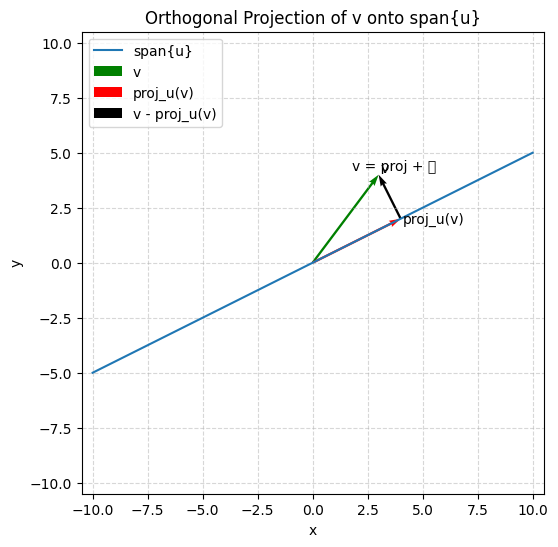

v = [3. 4.]
u = [2. 1.]
Projection of v onto span{u} = [4. 2.]
Perpendicular component v - proj = [-1.  2.]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

v = np.array([3.0, 4.0])
u = np.array([2.0, 1.0])


def proj_onto_u(v, u):
    if np.allclose(u, 0):
        raise ValueError("Vector u must be nonzero for a valid projection.")
    return (np.dot(v, u) / np.dot(u, u)) * u

proj = proj_onto_u(v, u)
perp = v - proj


fig, ax = plt.subplots(figsize=(6, 6))
t = np.linspace(-5, 5, 100)
line_points = np.outer(t, u)
ax.plot(line_points[:, 0], line_points[:, 1], linewidth=1.5, label="span{u}")

ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color="green",width=0.005, label="v")
ax.quiver(0, 0, proj[0], proj[1], angles='xy', scale_units='xy', scale=1, color="red", width=0.005, label="proj_u(v)")
ax.quiver(proj[0], proj[1], perp[0], perp[1], angles='xy', scale_units='xy', scale=1, width=0.005, label="v - proj_u(v)")

def annotate(vec, text, offset=(0.1, 0.1)):
    ax.text(vec[0] + offset[0], vec[1] + offset[1], text, fontsize=10)

annotate(v, "v")
annotate(proj, "proj_u(v)", offset=(0.1, -0.2))
annotate(proj + perp, "v = proj + ⟂", offset=(-1.2, 0.2))

all_pts = np.vstack([np.zeros(2), v, proj, proj + perp, line_points])
pad = 0.5
xmin, ymin = np.min(all_pts, axis=0) - pad
xmax, ymax = np.max(all_pts, axis=0) + pad
max_range = max(xmax - xmin, ymax - ymin)
mid_x = (xmax + xmin) / 2
mid_y = (ymax + ymin) / 2
ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)

ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Orthogonal Projection of v onto span{u}')
ax.legend(loc='upper left')

plt.show()
print("v =", v)
print("u =", u)
print("Projection of v onto span{u} =", proj)
print("Perpendicular component v - proj =", perp)


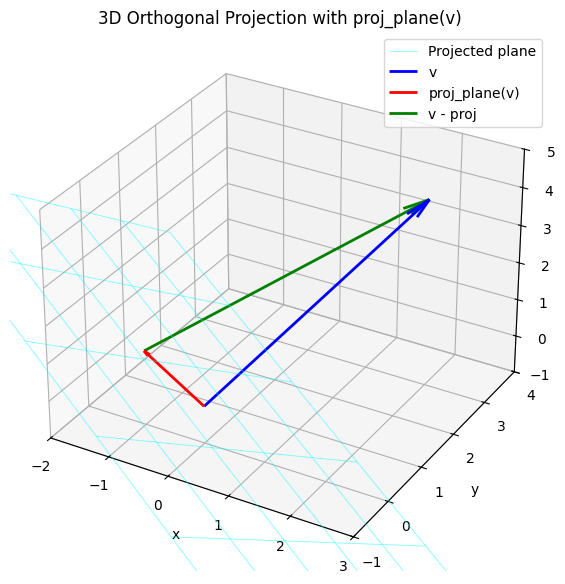

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v = np.array([2.0, 3.0, 4.0])
n = np.array([1.0, 1.0, 1.0])

coeff = np.dot(v, n) / np.dot(n, n)
proj = v - coeff * n
perp = v - proj


tmp = np.array([1.0, 0.0, 0.0])
if np.allclose(np.cross(n, tmp), 0):
    tmp = np.array([0.0, 1.0, 0.0])
u1 = np.cross(n, tmp); u1 = u1 / np.linalg.norm(u1)
u2 = np.cross(n, u1); u2 = u2 / np.linalg.norm(u2)
s = np.linspace(-5, 5, 11)
t = np.linspace(-5, 5, 11)
S, T = np.meshgrid(s, t)
plane = np.outer(S.ravel(), u1) + np.outer(T.ravel(), u2)
X = plane[:, 0].reshape(S.shape)
Y = plane[:, 1].reshape(S.shape)
Z = plane[:, 2].reshape(S.shape)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.6, alpha=0.5,color="cyan", label="Projected plane")

ax.quiver(0, 0, 0, v[0], v[1], v[2], color="blue", arrow_length_ratio=0.08, linewidth=2, label="v")
ax.quiver(0, 0, 0, proj[0], proj[1], proj[2], color="red", arrow_length_ratio=0.08, linewidth=2, label="proj_plane(v)")
ax.quiver(proj[0], proj[1], proj[2], perp[0], perp[1], perp[2], color="green", arrow_length_ratio=0.08, linewidth=2, label="v - proj")


all_pts = np.vstack([np.zeros(3), v, proj, proj + perp])
mins = all_pts.min(axis=0) - 1.0
maxs = all_pts.max(axis=0) + 1.0
ax.set_xlim(mins[0], maxs[0])
ax.set_ylim(mins[1], maxs[1])
ax.set_zlim(mins[2], maxs[2])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D Orthogonal Projection with proj_plane(v)")
ax.legend()

plt.show()


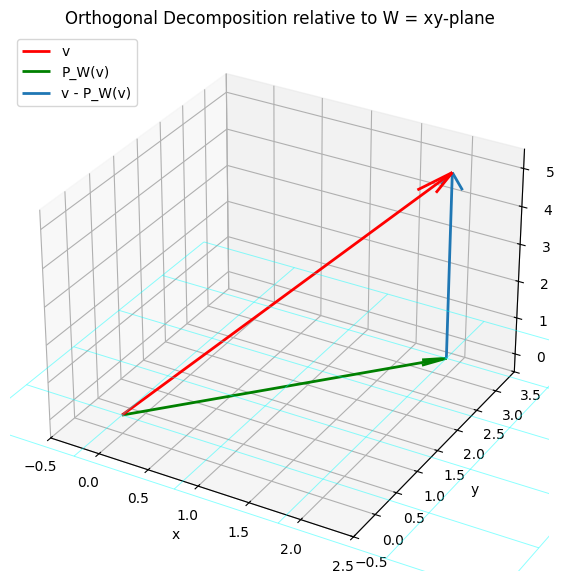

v = [2. 3. 5.]
P_W(v) = [2. 3. 0.]
Orthogonal component v - P_W(v) = [0. 0. 5.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

v = np.array([2.0, 3.0, 5.0])

proj_W_v = np.array([v[0], v[1], 0.0])
orth_comp = v - proj_W_v  # (0,0,z)

x = np.linspace(-1, 4, 11)
y = np.linspace(-1, 4, 11)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Orthogonal Decomposition relative to W = xy-plane")


ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.7, alpha=0.45, color="cyan")


ax.quiver(0, 0, 0, v[0], v[1], v[2], arrow_length_ratio=0.08, color="red", linewidth=2, label="v")
ax.quiver(0, 0, 0, proj_W_v[0], proj_W_v[1], proj_W_v[2], arrow_length_ratio=0.08, color="green", linewidth=2, label="P_W(v)")
ax.quiver(proj_W_v[0], proj_W_v[1], proj_W_v[2],
          orth_comp[0], orth_comp[1], orth_comp[2],
          arrow_length_ratio=0.08, linewidth=2, label="v - P_W(v)")


all_pts = np.vstack([np.zeros(3), v, proj_W_v, v - proj_W_v])
mins = all_pts.min(axis=0) - 0.5
maxs = all_pts.max(axis=0) + 0.5
ax.set_xlim(mins[0], maxs[0])
ax.set_ylim(mins[1], maxs[1])
ax.set_zlim(mins[2], maxs[2])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend(loc="upper left")
plt.show()

print("v =", v)
print("P_W(v) =", proj_W_v)
print("Orthogonal component v - P_W(v) =", orth_comp)


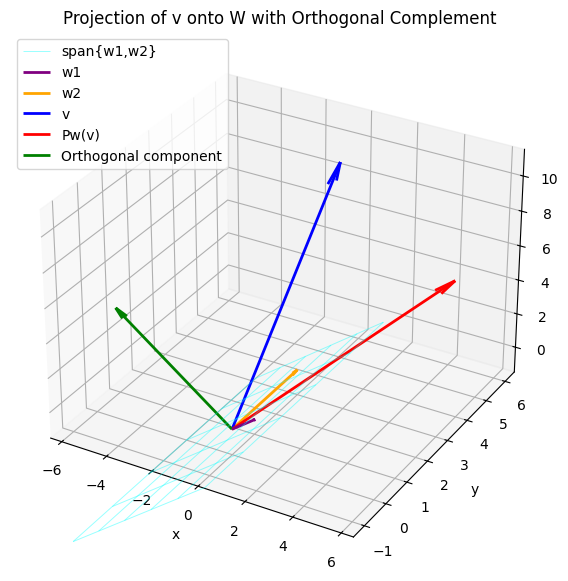

Projection Pw(v) = [5. 5. 5.]
Orthogonal component v - Pw(v) = [-5.  0.  5.]


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

w1 = np.array([1.0, 0.0, 1.0])
w2 = np.array([0.0, 3.0, 0.0])
v  = np.array([0.0, 5.0, 10.0])


u1 = w1 / np.linalg.norm(w1)
proj_w2_on_u1 = (np.dot(w2, u1) / np.dot(u1, u1)) * u1
w2_perp = w2 - proj_w2_on_u1
u2 = w2_perp / np.linalg.norm(w2_perp)


U = np.column_stack([u1, u2])
P = U @ U.T
proj_v = P @ v  # Pw(v)
orth_comp = v - proj_v

s = np.linspace(-4, 4, 11)
t = np.linspace(-4, 4, 11)
S, T = np.meshgrid(s, t)
plane = np.outer(S.ravel(), u1) + np.outer(T.ravel(), u2)
X = plane[:, 0].reshape(S.shape)
Y = plane[:, 1].reshape(S.shape)
Z = plane[:, 2].reshape(S.shape)


fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Projection of v onto W with Orthogonal Complement")


ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.7, alpha=0.4, color="cyan", label="span{w1,w2}")


ax.quiver(0, 0, 0, w1[0], w1[1], w1[2], color="purple", arrow_length_ratio=0.08, linewidth=2, label="w1")
ax.quiver(0, 0, 0, w2[0], w2[1], w2[2], color="orange", arrow_length_ratio=0.08, linewidth=2, label="w2")
ax.quiver(0, 0, 0, v[0],  v[1],  v[2],  color="blue", arrow_length_ratio=0.08, linewidth=2, label="v")
ax.quiver(0, 0, 0, proj_v[0], proj_v[1], proj_v[2], color="red", arrow_length_ratio=0.08, linewidth=2, label="Pw(v)")
ax.quiver(0, 0, 0, orth_comp[0], orth_comp[1], orth_comp[2], color="green", arrow_length_ratio=0.08, linewidth=2, label="Orthogonal component")

all_pts = np.vstack([np.zeros(3), w1, w2, v, proj_v, orth_comp])
mins = all_pts.min(axis=0) - 1.5
maxs = all_pts.max(axis=0) + 1.5
ax.set_xlim(mins[0], maxs[0])
ax.set_ylim(mins[1], maxs[1])
ax.set_zlim(mins[2], maxs[2])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend(loc="upper left")

plt.show()

print("Projection Pw(v) =", proj_v)
print("Orthogonal component v - Pw(v) =", orth_comp)


---
# Non defective matrix example

--- Visualization 1: Non-Defective Matrix (Stretching) ---
This matrix stretches space by a factor of 2 horizontally and 3 vertically.
Notice how the grid lines remain perpendicular.


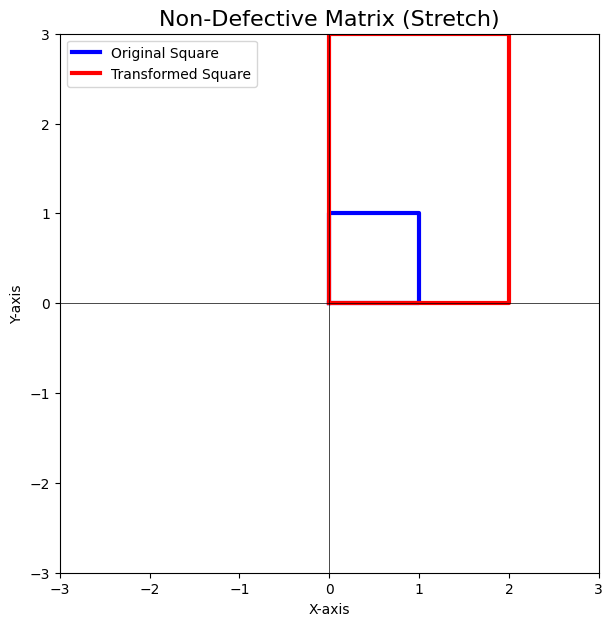

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A_non_defective = np.array([
    [2, 0],
    [0, 3]
])


x_nd = np.linspace(-1, 1, 10)
y_nd = np.linspace(-1, 1, 10)
xx_nd, yy_nd = np.meshgrid(x_nd, y_nd)
points_nd = np.vstack([xx_nd.ravel(), yy_nd.ravel()])


unit_square_nd = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
transformed_points_nd = A_non_defective @ points_nd
transformed_square_nd = A_non_defective @ unit_square_nd
plt.figure(figsize=(7, 7))
plt.plot(unit_square_nd[0], unit_square_nd[1], 'b', linewidth=3, label='Original Square')
plt.plot(transformed_square_nd[0], transformed_square_nd[1], 'r', linewidth=3, label='Transformed Square')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Non-Defective Matrix (Stretch)", fontsize=16)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
max_val_nd = max(np.abs(transformed_square_nd).max(), 1.5)
plt.xlim(-max_val_nd, max_val_nd)
plt.ylim(-max_val_nd, max_val_nd)
plt.show()


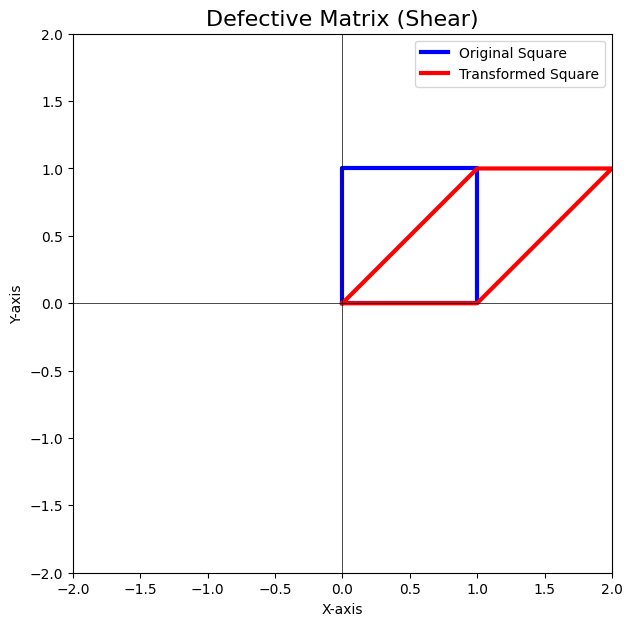

In [ ]:
A_defective = np.array([
    [1, 1],
    [0, 1]
])

x_d = np.linspace(-1, 1, 10)
y_d = np.linspace(-1, 1, 10)
xx_d, yy_d = np.meshgrid(x_d, y_d)
points_d = np.vstack([xx_d.ravel(), yy_d.ravel()])
unit_square_d = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])

transformed_points_d = A_defective @ points_d
transformed_square_d = A_defective @ unit_square_d

plt.figure(figsize=(7, 7))

plt.plot(unit_square_d[0], unit_square_d[1], 'b', linewidth=3, label='Original Square')
plt.plot(transformed_square_d[0], transformed_square_d[1], 'r', linewidth=3, label='Transformed Square')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Defective Matrix (Shear)", fontsize=16)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
max_val_d = max(np.abs(transformed_square_d).max(), 1.5)
plt.xlim(-max_val_d, max_val_d)
plt.ylim(-max_val_d, max_val_d)
plt.show()
